## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 75us/step - loss: 2.2674 - acc: 0.1648 - val_loss: 2.2137 - val_acc: 0.2079
Epoch 2/500
50000/50000 [==============================] - 2s 49us/step - loss: 2.1783 - acc: 0.2190 - val_loss: 2.1488 - val_acc: 0.2303
Epoch 3/500
50000/50000 [==============================] - 2s 49us/step - loss: 2.1223 - acc: 0.2440 - val_loss: 2.1007 - val_acc: 0.2532
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.0799 - acc: 0.2646 - val_loss: 2.0625 - val_acc: 0.2727
Epoch 5/500
50000/50000 [==============================] - 2s 49us/step - loss: 2.0443 - acc: 0.2830 - val_loss: 2.0291 - val_acc: 0.2945
Epoch 6/500
50000/50000 [==============================] - 2s 49us/step - loss: 2.0131 - acc: 0.2981 - val_loss: 2.0006 - val_acc: 0.3054
Epoch 7/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.9868 - acc: 0.3108 - val_loss: 1.9763 - 

50000/50000 [==============================] - 3s 56us/step - loss: 1.6433 - acc: 0.4288 - val_loss: 1.6521 - val_acc: 0.4243
Epoch 60/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6403 - acc: 0.4308 - val_loss: 1.6488 - val_acc: 0.4236
Epoch 61/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6376 - acc: 0.4317 - val_loss: 1.6439 - val_acc: 0.4276
Epoch 62/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.6344 - acc: 0.4330 - val_loss: 1.6442 - val_acc: 0.4290
Epoch 63/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.6317 - acc: 0.4326 - val_loss: 1.6389 - val_acc: 0.4290
Epoch 64/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.6286 - acc: 0.4338 - val_loss: 1.6350 - val_acc: 0.4302
Epoch 65/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.6259 - acc: 0.4363 - val_loss: 1.6338 - val_acc: 0.4292
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5091 - acc: 0.4757 - val_loss: 1.5345 - val_acc: 0.4640
Epoch 119/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5074 - acc: 0.4777 - val_loss: 1.5376 - val_acc: 0.4615A: 1s - l - ETA: 0s - loss: 1.5064 - acc: 0.47
Epoch 120/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5055 - acc: 0.4775 - val_loss: 1.5346 - val_acc: 0.4644
Epoch 121/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5035 - acc: 0.4790 - val_loss: 1.5333 - val_acc: 0.4639
Epoch 122/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5018 - acc: 0.4783 - val_loss: 1.5319 - val_acc: 0.4665
Epoch 123/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5003 - acc: 0.4775 - val_loss: 1.5308 - val_acc: 0.4690
Epoch 124/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4980 - acc: 0.4788 - val_loss:

50000/50000 [==============================] - 3s 55us/step - loss: 1.4154 - acc: 0.5061 - val_loss: 1.4689 - val_acc: 0.4849 - loss: 1.4167 - ac
Epoch 176/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4135 - acc: 0.5089 - val_loss: 1.4662 - val_acc: 0.4858
Epoch 177/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4118 - acc: 0.5086 - val_loss: 1.4689 - val_acc: 0.4829
Epoch 178/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4104 - acc: 0.5079 - val_loss: 1.4635 - val_acc: 0.4875
Epoch 179/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4087 - acc: 0.5108 - val_loss: 1.4684 - val_acc: 0.4838
Epoch 180/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4077 - acc: 0.5095 - val_loss: 1.4652 - val_acc: 0.4880
Epoch 181/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4058 - acc: 0.5097 - val_loss: 1.4619 - val_acc: 0.4872
Epoch 182/500


50000/50000 [==============================] - 3s 55us/step - loss: 1.3324 - acc: 0.5364 - val_loss: 1.4154 - val_acc: 0.4999
Epoch 234/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3312 - acc: 0.5349 - val_loss: 1.4191 - val_acc: 0.4985: 0s - loss: 1.3259 - acc: 0.537 - ETA: 0s - loss: 1.3251 - 
Epoch 235/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3301 - acc: 0.5362 - val_loss: 1.4214 - val_acc: 0.5018  - ETA: 0s - loss: 1.3298 - acc: 0.
Epoch 236/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3287 - acc: 0.5367 - val_loss: 1.4194 - val_acc: 0.4963
Epoch 237/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3274 - acc: 0.5373 - val_loss: 1.4285 - val_acc: 0.4950
Epoch 238/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3263 - acc: 0.5370 - val_loss: 1.4122 - val_acc: 0.5006
Epoch 239/500
50000/50000 [==============================] - 3s 55us/step - lo

50000/50000 [==============================] - 3s 58us/step - loss: 1.2613 - acc: 0.5591 - val_loss: 1.4361 - val_acc: 0.4977
Epoch 291/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2605 - acc: 0.5583 - val_loss: 1.4014 - val_acc: 0.5051
Epoch 292/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2587 - acc: 0.5584 - val_loss: 1.3899 - val_acc: 0.5109: 1s - loss: 1.2 - ETA: 0s - loss: 1.2605 - acc
Epoch 293/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2579 - acc: 0.5598 - val_loss: 1.3835 - val_acc: 0.5103 - acc: 0.559
Epoch 294/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2568 - acc: 0.5603 - val_loss: 1.4000 - val_acc: 0.5019lo - ETA: 0s - loss: 1.2557 - acc: 0
Epoch 295/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2554 - acc: 0.5596 - val_loss: 1.3865 - val_acc: 0.5111
Epoch 296/500
50000/50000 [==============================] - 3s 55us/step - lo

50000/50000 [==============================] - 3s 56us/step - loss: 1.1984 - acc: 0.5800 - val_loss: 1.3596 - val_acc: 0.5160
Epoch 347/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1967 - acc: 0.5797 - val_loss: 1.3612 - val_acc: 0.5184
Epoch 348/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1970 - acc: 0.5800 - val_loss: 1.3701 - val_acc: 0.5150
Epoch 349/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1947 - acc: 0.5801 - val_loss: 1.3581 - val_acc: 0.5200
Epoch 350/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1931 - acc: 0.5816 - val_loss: 1.3721 - val_acc: 0.5138
Epoch 351/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1924 - acc: 0.5836 - val_loss: 1.3547 - val_acc: 0.5208 - loss: 1.1916 - acc:  - ETA: 1s - loss: 1. - ETA: 0s - loss: 1.1943 - acc: 0
Epoch 352/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1923 - acc: 

50000/50000 [==============================] - 3s 55us/step - loss: 1.1388 - acc: 0.6021 - val_loss: 1.3542 - val_acc: 0.5220
Epoch 404/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1367 - acc: 0.6019 - val_loss: 1.3606 - val_acc: 0.5218
Epoch 405/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1357 - acc: 0.6032 - val_loss: 1.3567 - val_acc: 0.5218
Epoch 406/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1345 - acc: 0.6030 - val_loss: 1.4066 - val_acc: 0.5167
Epoch 407/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1332 - acc: 0.6036 - val_loss: 1.3869 - val_acc: 0.5038
Epoch 408/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1319 - acc: 0.6055 - val_loss: 1.3393 - val_acc: 0.5272
Epoch 409/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1310 - acc: 0.6031 - val_loss: 1.3689 - val_acc: 0.5213
Epoch 410/500
50000/50000 [=======

50000/50000 [==============================] - 3s 55us/step - loss: 1.0778 - acc: 0.6230 - val_loss: 1.3685 - val_acc: 0.5196
Epoch 462/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0775 - acc: 0.6238 - val_loss: 1.3702 - val_acc: 0.5135
Epoch 463/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0772 - acc: 0.6241 - val_loss: 1.3706 - val_acc: 0.5230
Epoch 464/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.0742 - acc: 0.6263 - val_loss: 1.3413 - val_acc: 0.5319
Epoch 465/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0731 - acc: 0.6268 - val_loss: 1.3551 - val_acc: 0.5215
Epoch 466/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0729 - acc: 0.6250 - val_loss: 1.3464 - val_acc: 0.5240
Epoch 467/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0713 - acc: 0.6265 - val_loss: 1.3626 - val_acc: 0.5235
Epoch 468/500
50000/50000 [=======

In [7]:
import matplotlib.pyplot as plt
# 以視覺化方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

<Figure size 640x480 with 1 Axes>

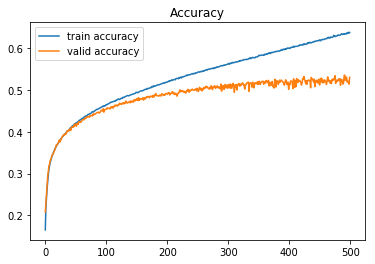

In [8]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()